# COLCAP
fonte: https://es.investing.com/indices/colcap-historical-data


In [2]:
import pandas as pd

df_colcap = pd.read_csv(r'C:\Users\diogo\Documents\ciencia de  dados\data\COLCAP.csv')


# coloca a data em formato da data
df_colcap['Fecha'] = pd.to_datetime(df_colcap['Fecha'], dayfirst=True)

# troca os valores de string para float
df_colcap['Último'] = df_colcap["Último"].str.replace('.','')
df_colcap['Último'] = df_colcap["Último"].str.replace(',','.')
df_colcap['Último'] = df_colcap["Último"].astype(float)

df_colcap['Apertura'] = df_colcap["Apertura"].str.replace('.','')
df_colcap['Apertura'] = df_colcap["Apertura"].str.replace(',','.')
df_colcap['Apertura'] = df_colcap["Apertura"].astype(float)

df_colcap['Máximo'] = df_colcap["Máximo"].str.replace('.','')
df_colcap['Máximo'] = df_colcap["Máximo"].str.replace(',','.')
df_colcap['Máximo'] = df_colcap["Máximo"].astype(float)

df_colcap['Mínimo'] = df_colcap["Mínimo"].str.replace('.','')
df_colcap['Mínimo'] = df_colcap["Mínimo"].str.replace(',','.')
df_colcap['Mínimo'] = df_colcap["Mínimo"].astype(float)

df_colcap['% var.'] = df_colcap["% var."].str.replace(',','.')
df_colcap['% var.'] = df_colcap["% var."].str.replace('%','')
df_colcap['% var.'] = df_colcap["% var."].astype(float)

# seta data como index
df_colcap = df_colcap.set_index(df_colcap['Fecha'])

# seleciona apenas as colunas max e min
df_colcap_maxmin = df_colcap[['Máximo','Mínimo']]

# seleciona apenas a variação
df_colcap_var = df_colcap['% var.']

df_colcap

Fecha   Último  Apertura   Máximo   Mínimo Vol.  % var.
Fecha                                                                  
2020-10-09 2020-10-09  1190.01   1186.42  1190.01  1182.43    -    0.30
2020-10-08 2020-10-08  1186.42   1174.49  1186.42  1168.83    -    1.02
2020-10-07 2020-10-07  1174.49   1168.93  1174.63  1160.13    -    0.48
2020-10-06 2020-10-06  1168.93   1168.04  1178.41  1168.04    -    0.08
2020-10-05 2020-10-05  1168.04   1165.01  1174.34  1164.68    -    0.26
...               ...      ...       ...      ...      ...  ...     ...
2020-01-09 2020-01-09  1653.54   1656.96  1657.97  1639.30    -   -0.21
2020-01-08 2020-01-08  1656.96   1663.83  1666.29  1648.58    -   -0.41
2020-01-07 2020-01-07  1663.83   1676.49  1677.60  1662.19    -   -0.76
2020-01-03 2020-01-03  1676.49   1658.77  1676.49  1648.49    -    1.07
2020-01-02 2020-01-02  1658.77   1662.42  1662.82  1649.50    -   -0.22

[190 rows x 7 columns]

In [3]:
import pandas as pd

df_acoes = pd.read_excel('data/covid_bol.xlsx')
for i in range(4):
    df_acoes = df_acoes.drop(i)
    
df_acoes.iloc[0, 1:256] = '2020-0' + df_acoes.iloc[0, 1:df_acoes.shape[1]-2].astype(str)
df_acoes.iloc[0, 256:287] = '2020-' + df_acoes.iloc[0, 1:df_acoes.shape[1]-2].astype(str)
df_acoes.iloc[0, 1:df_acoes.shape[1]-2] = df_acoes.iloc[0, 1:df_acoes.shape[1]-2].str.replace('/','-')
df_acoes.iloc[0,52] = '2020-03-11'
df_acoes.iloc[0, 1:df_acoes.shape[1]-2] = df_acoes.iloc[0, 1:df_acoes.shape[1]-2].str.replace(' ','')
df_acoes.iloc[0, 1:df_acoes.shape[1]-2] = pd.to_datetime(df_acoes.iloc[0, 1:df_acoes.shape[1]-2], format='%Y-%m-%d', yearfirst=True)


df_acoes = df_acoes.apply(pd.to_numeric, errors='ignore', downcast='integer')
df_acoes = df_acoes.T
df_acoes = df_acoes.set_index(4)
df_acoes = df_acoes.fillna(0)
df_acoes = df_acoes.T
df_acoes = df_acoes.set_index('Action starting date')



### Indice COLCAP jan-agora

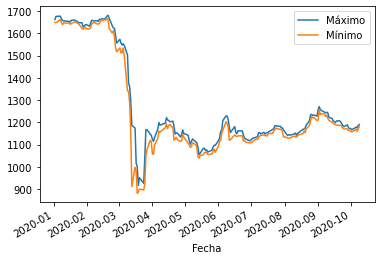

In [3]:
#imprime grafico de max e min
df_colcap_maxmin.plot.line()


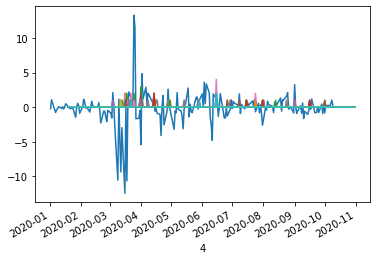

In [4]:
#imprime grafico de variação diaria
df_colcap_var.plot.line()

for i in range (df_acoes.shape[0]):
    df_acoes.iloc[i,:df_acoes.shape[1]-2].plot.line()
    


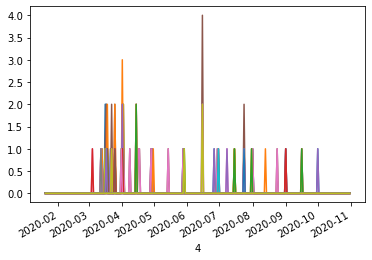

In [5]:
for i in range (df_acoes.shape[0]):
    df_acoes.iloc[i,:df_acoes.shape[1]-2].plot.line()

In [8]:
df_acoes.iloc[15].plot

4
2020-01-20 00:00:00     0
2020-01-21 00:00:00     0
2020-01-22 00:00:00     0
2020-01-23 00:00:00     0
2020-01-24 00:00:00     0
                       ..
2020-10-29 00:00:00     0
2020-10-30 00:00:00     0
2020-10-31 00:00:00     0
blank                   0
Total                  28
Name: C. Economy, Length: 288, dtype: object

# PIB
fonte = https://www.ine.gob.bo/index.php/estadisticas-economicas/pib-y-cuentas-nacionales/producto-interno-bruto-trimestral/producto-interno-bruto-por-actividad-economica/

In [12]:
df_pib = pd.read_csv(r"C:\Users\diogo\Documents\ciencia de  dados\data\pibbol.csv")

# as primeiras 8 linhas sao valores nan
for i in range(8):
    df_pib = df_pib.drop(i)

# reseta o index 
df_pib = df_pib.reset_index()
del df_pib['index']

# pega o index certo
df_pib = df_pib.T
df_pib = df_pib.set_index(df_pib.iloc[:,0])
df_pib = df_pib.T

df_pib = df_pib.drop(154)
df_pib = df_pib.drop(153)


#exclui a primeira linha de valor nulo
df_pib = df_pib.drop(0)

df_pib = df_pib.set_index(df_pib.iloc[:,0])
df_pib.to_csv(r"C:\Users\diogo\Documents\ciencia de  dados\data\pibbol_limpo.csv", index=False)

In [13]:
df_pib2020 = pd.read_csv(r"C:\Users\diogo\Documents\ciencia de  dados\data\pibbol_limpo.csv")
df_pib2020 = df_pib2020[151:152] #1° trimestre

# transforma dados em int
df_pib2020['AGRICULTURA, SILVICULTURA, CAZA Y PESCA'] = df_pib2020["AGRICULTURA, SILVICULTURA, CAZA Y PESCA"].str.replace('.','')
df_pib2020['AGRICULTURA, SILVICULTURA, CAZA Y PESCA'] = df_pib2020["AGRICULTURA, SILVICULTURA, CAZA Y PESCA"].astype(int)

df_pib2020['PETRÓLEO CRUDO  Y GAS NATURAL'] = df_pib2020["PETRÓLEO CRUDO  Y GAS NATURAL"].str.replace('.','')
df_pib2020['PETRÓLEO CRUDO  Y GAS NATURAL'] = df_pib2020["PETRÓLEO CRUDO  Y GAS NATURAL"].astype(int)

df_pib2020['MINERALES METÁLICOS Y NO METÁLICOS'] = df_pib2020["MINERALES METÁLICOS Y NO METÁLICOS"].str.replace('.','')
df_pib2020['MINERALES METÁLICOS Y NO METÁLICOS'] = df_pib2020["MINERALES METÁLICOS Y NO METÁLICOS"].astype(int)

df_pib2020['INDUSTRIA MANUFACTURERA'] = df_pib2020["INDUSTRIA MANUFACTURERA"].str.replace('.','')
df_pib2020['INDUSTRIA MANUFACTURERA'] = df_pib2020["INDUSTRIA MANUFACTURERA"].astype(int)

df_pib2020['ELECTRICIDAD, GAS Y AGUA'] = df_pib2020["ELECTRICIDAD, GAS Y AGUA"].str.replace('.','')
df_pib2020['ELECTRICIDAD, GAS Y AGUA'] = df_pib2020["ELECTRICIDAD, GAS Y AGUA"].astype(int)

df_pib2020['CONSTRUCCIÓN'] = df_pib2020["CONSTRUCCIÓN"].str.replace('.','')
df_pib2020['CONSTRUCCIÓN'] = df_pib2020["CONSTRUCCIÓN"].astype(int)

df_pib2020['COMERCIO'] = df_pib2020["COMERCIO"].str.replace('.','')
df_pib2020['COMERCIO'] = df_pib2020["COMERCIO"].astype(int)

df_pib2020['TRANSPORTE Y COMUNICACIONES'] = df_pib2020["TRANSPORTE Y COMUNICACIONES"].str.replace('.','')
df_pib2020['TRANSPORTE Y COMUNICACIONES'] = df_pib2020["TRANSPORTE Y COMUNICACIONES"].astype(int)

df_pib2020['ESTABLECIMIENTOS FINANCIEROS, SEGUROS, BIENES INMUEBLES Y SERVICIOS A LAS EMPRESAS'] = df_pib2020["ESTABLECIMIENTOS FINANCIEROS, SEGUROS, BIENES INMUEBLES Y SERVICIOS A LAS EMPRESAS"].str.replace('.','')
df_pib2020['ESTABLECIMIENTOS FINANCIEROS, SEGUROS, BIENES INMUEBLES Y SERVICIOS A LAS EMPRESAS'] = df_pib2020["ESTABLECIMIENTOS FINANCIEROS, SEGUROS, BIENES INMUEBLES Y SERVICIOS A LAS EMPRESAS"].astype(int)

df_pib2020['SERVICIOS DE LA ADMINISTRACIÓN PÚBLICA'] = df_pib2020["SERVICIOS DE LA ADMINISTRACIÓN PÚBLICA"].str.replace('.','')
df_pib2020['SERVICIOS DE LA ADMINISTRACIÓN PÚBLICA'] = df_pib2020["SERVICIOS DE LA ADMINISTRACIÓN PÚBLICA"].astype(int)

df_pib2020['OTROS SERVICIOS'] = df_pib2020["OTROS SERVICIOS"].str.replace('.','')
df_pib2020['OTROS SERVICIOS'] = df_pib2020["OTROS SERVICIOS"].astype(int)

df_pib2020['SERVICIOS BANCARIOS IMPUTADOS'] = df_pib2020["SERVICIOS BANCARIOS IMPUTADOS"].str.replace('.','')
df_pib2020['SERVICIOS BANCARIOS IMPUTADOS'] = df_pib2020["SERVICIOS BANCARIOS IMPUTADOS"].astype(int)

df_pib2020['PIB A PRECIOS BÁSICOS'] = df_pib2020["PIB A PRECIOS BÁSICOS"].str.replace('.','')
df_pib2020['PIB A PRECIOS BÁSICOS'] = df_pib2020["PIB A PRECIOS BÁSICOS"].astype(int)

df_pib2020['DERECHOS DE IMPORTACIÓN, IVA, IT Y OTROS IMPUESTOS INDIRECTOS'] = df_pib2020["DERECHOS DE IMPORTACIÓN, IVA, IT Y OTROS IMPUESTOS INDIRECTOS"].str.replace('.','')
df_pib2020['DERECHOS DE IMPORTACIÓN, IVA, IT Y OTROS IMPUESTOS INDIRECTOS'] = df_pib2020["DERECHOS DE IMPORTACIÓN, IVA, IT Y OTROS IMPUESTOS INDIRECTOS"].astype(int)

df_pib2020['PIB A PRECIOS DE MERCADO'] = df_pib2020["PIB A PRECIOS DE MERCADO"].str.replace('.','')
df_pib2020['PIB A PRECIOS DE MERCADO'] = df_pib2020["PIB A PRECIOS DE MERCADO"].astype(int)

df_pib2020.T



151
PERIODO                                              I   Trimestre
AGRICULTURA, SILVICULTURA, CAZA Y PESCA                    1552242
PETRÓLEO CRUDO  Y GAS NATURAL                               510840
MINERALES METÁLICOS Y NO METÁLICOS                          502089
INDUSTRIA MANUFACTURERA                                    1782962
ELECTRICIDAD, GAS Y AGUA                                    230352
CONSTRUCCIÓN                                                220783
COMERCIO                                                    900972
TRANSPORTE Y COMUNICACIONES                                1253570
ESTABLECIMIENTOS FINANCIEROS, SEGUROS, BIENES I...         1579296
SERVICIOS DE LA ADMINISTRACIÓN PÚBLICA                     1271877
OTROS SERVICIOS                                             774215
SERVICIOS BANCARIOS IMPUTADOS                              -619414
PIB A PRECIOS BÁSICOS                                      9959784
DERECHOS DE IMPORTACIÓN, IVA, IT Y OTROS IMPUES...         1419793
PIB A PRECIOS DE MERCADO                                  11379577

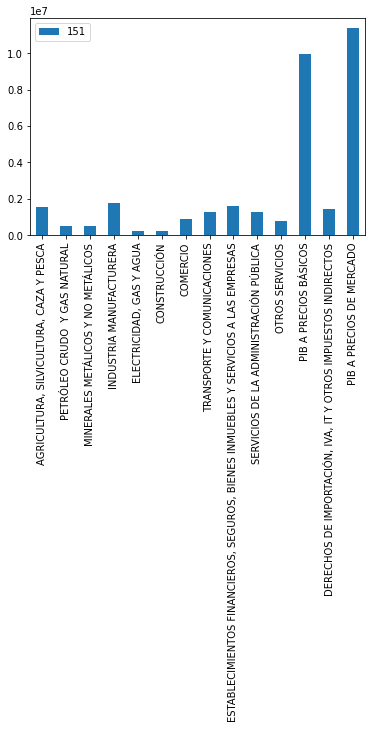

In [19]:
df_pib2020.plot.bar()